In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'customersegmentationdataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1220468%2F2037868%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T183128Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D626ca46ff2f09cb940c6363d565c2614f19f1ebf2f7be4228d5b89f7ef4ed99e5e8badb1c5ae043ccdf56efe63c5e76b1408862c561e2f596a82f2e945447f11f87db8a8a88e8da24095cf3b344cb9eadeb1c5787faafad7a5c6fbedfd6e63b2cae9d31f7435a0bbbc5f307f1644d7a1c0860281a3138f2dc76c12e1b71ca1fd6ed4f9e383ad2ccc12ba565e67fbf44ef8d99fa3e8c00941f28ed19ea35be43aa2c40fcc517142dfe9f16bedf8c4b32c2d393aecadd5dea2117e7f97d8547e76553ef8c8a2c59743819fae71407209d72d40e5e130117c7ab34424b5e78d0f2b6aff54666f80530ca37727abbdaa56b0dfe6155b84c5737fd57e3267db022df6'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: customersegmentationdataset"
[1] "Downloaded and uncompressed: customersegmentationdataset"
[1] "Data source import complete"


In [5]:
customer_data <- read.csv("../input/customersegmentationdataset/Mall_Customers.csv")

In [4]:
dim(customer_data)
str(customer_data)

names(customer_data)

[1] 200   5

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

We will now display the first six rows of our dataset using the head() function and use the summary() function to Age.

In [ ]:
head(customer_data)
summary(customer_data$Age)
sd(customer_data$Age)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<fct>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 13.96901

In [ ]:
summary(customer_data$Annual.Income..k..)
sd(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

In [ ]:
summary(customer_data$Spending.Score..1.100.)
sd(customer_data$Spending.Score..1.100.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

[1] 25.82352

# Customer Gender Visualization

we will create a barplot and a piechart to show the gender distribution across our customer_data dataset.

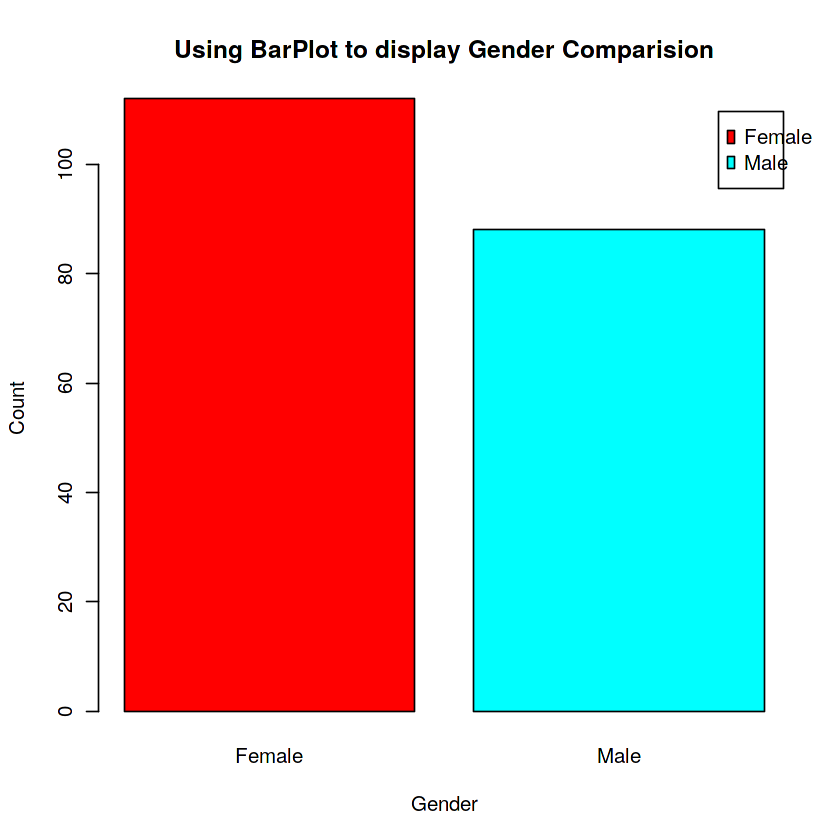

In [ ]:
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

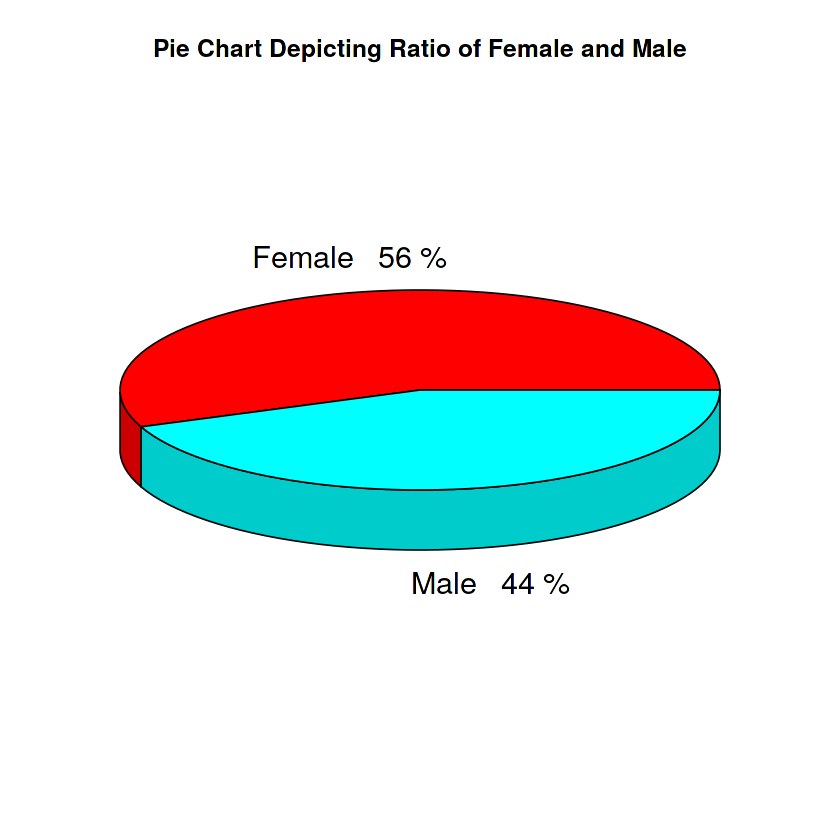

In [ ]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male")

From the above graph, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%.

In [ ]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

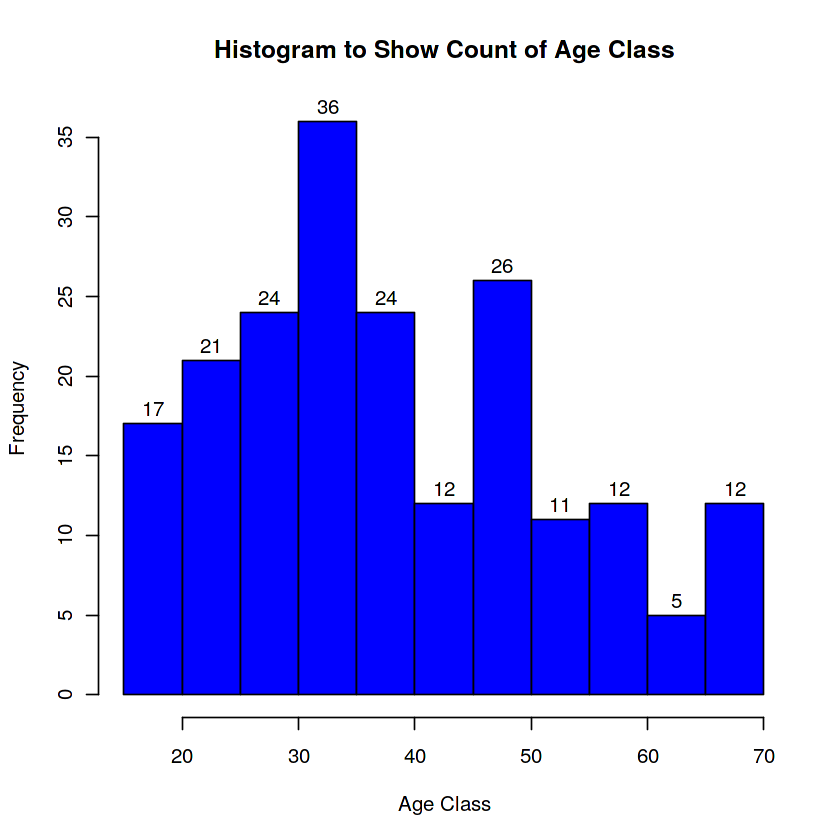

In [ ]:
hist(customer_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

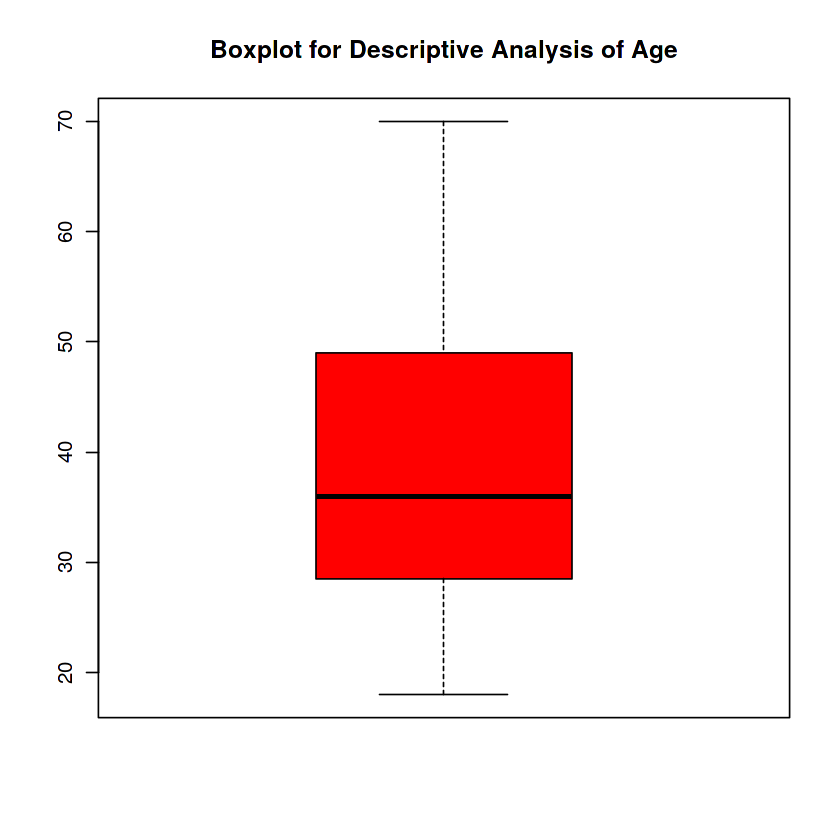

In [ ]:
boxplot(customer_data$Age,
       col="red",
       main="Boxplot for Descriptive Analysis of Age")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

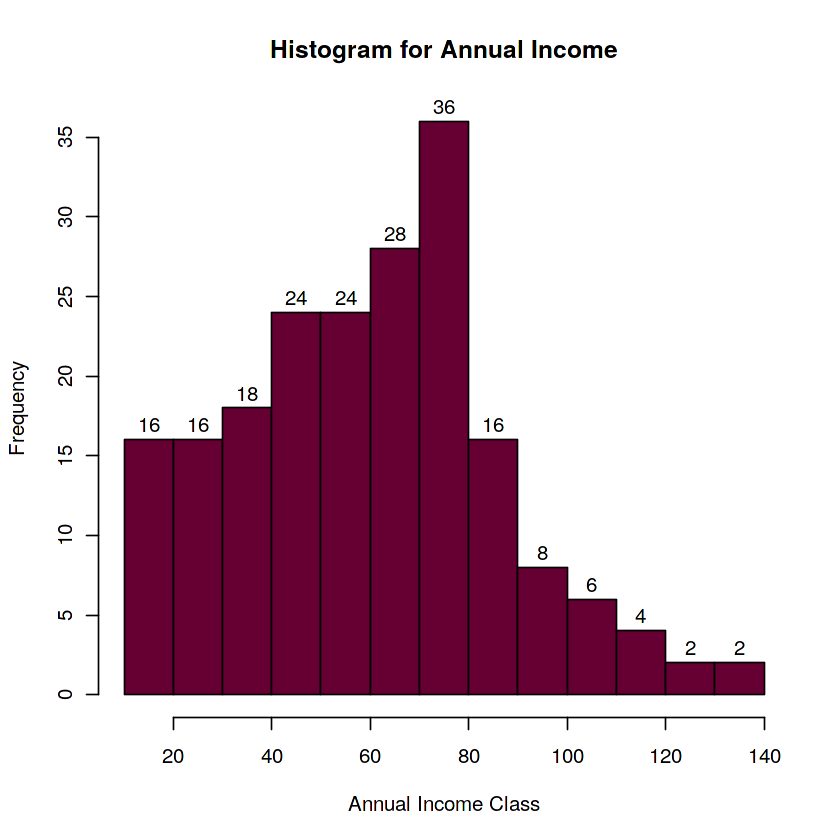

In [ ]:
summary(customer_data$Annual.Income..k..)
hist(customer_data$Annual.Income..k..,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

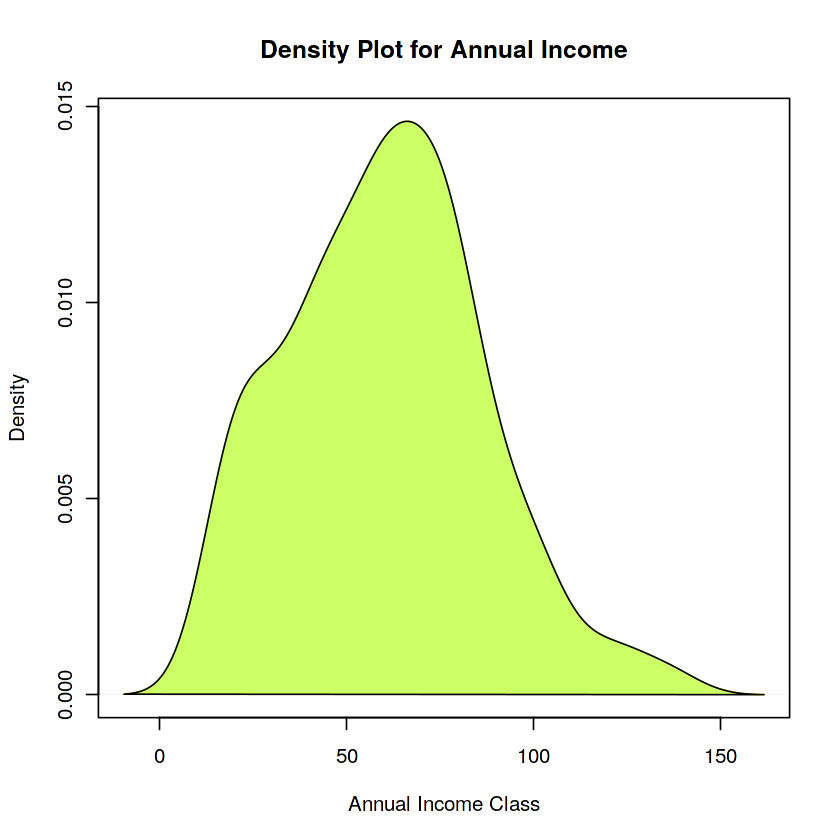

In [ ]:
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

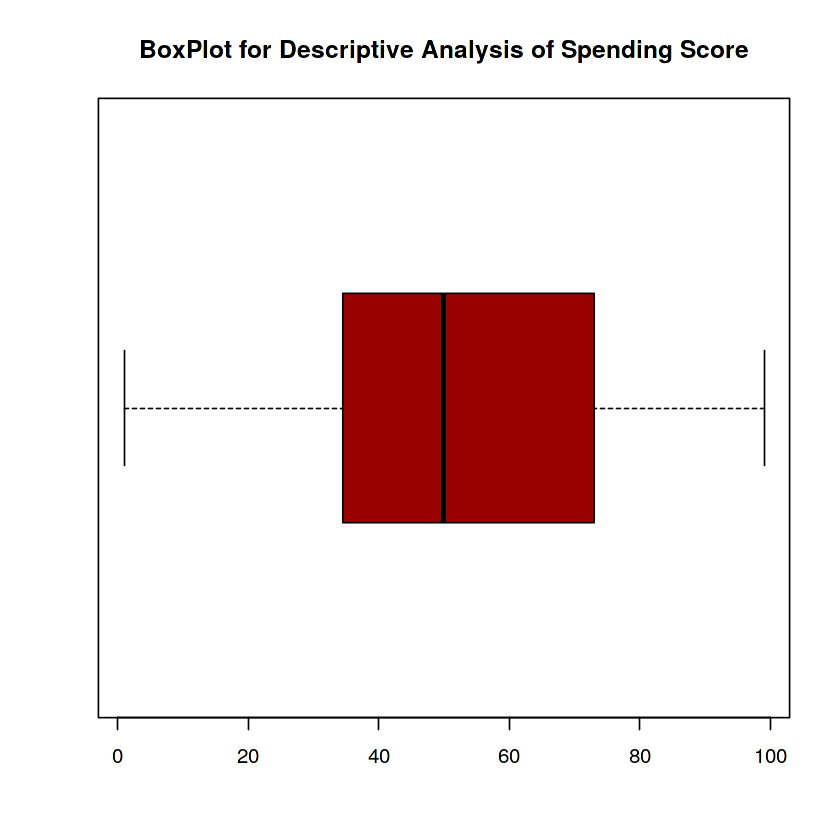

In [ ]:
summary(customer_data$Spending.Score..1.100.)

boxplot(customer_data$Spending.Score..1.100.,
   horizontal=TRUE,
   col="#990000",
   main="BoxPlot for Descriptive Analysis of Spending Score")

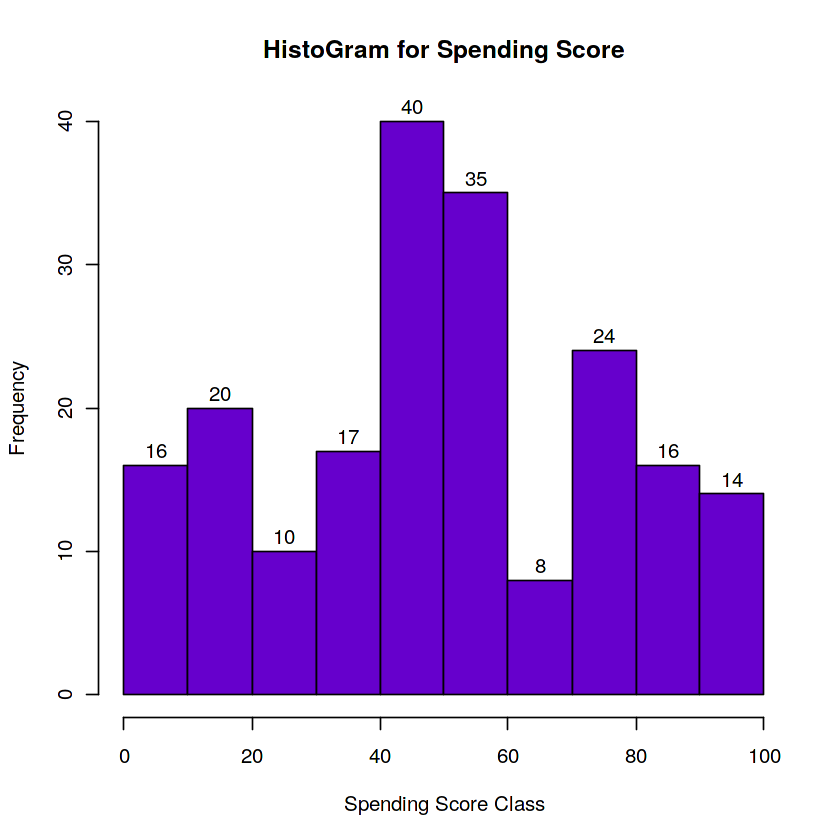

In [ ]:
hist(customer_data$Spending.Score..1.100.,
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

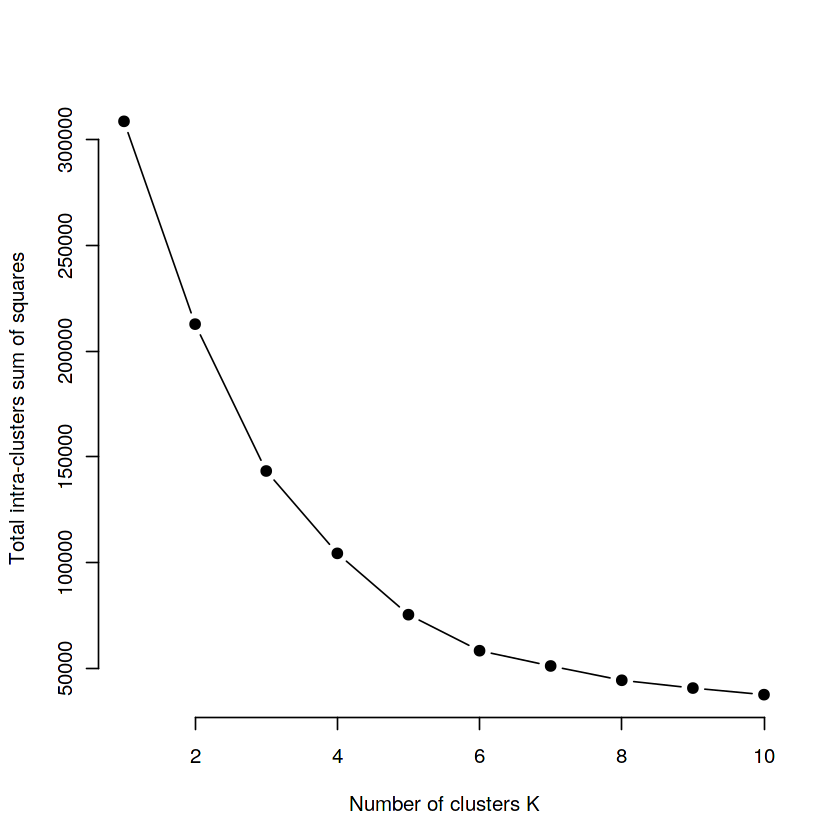

In [ ]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10


iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE,
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

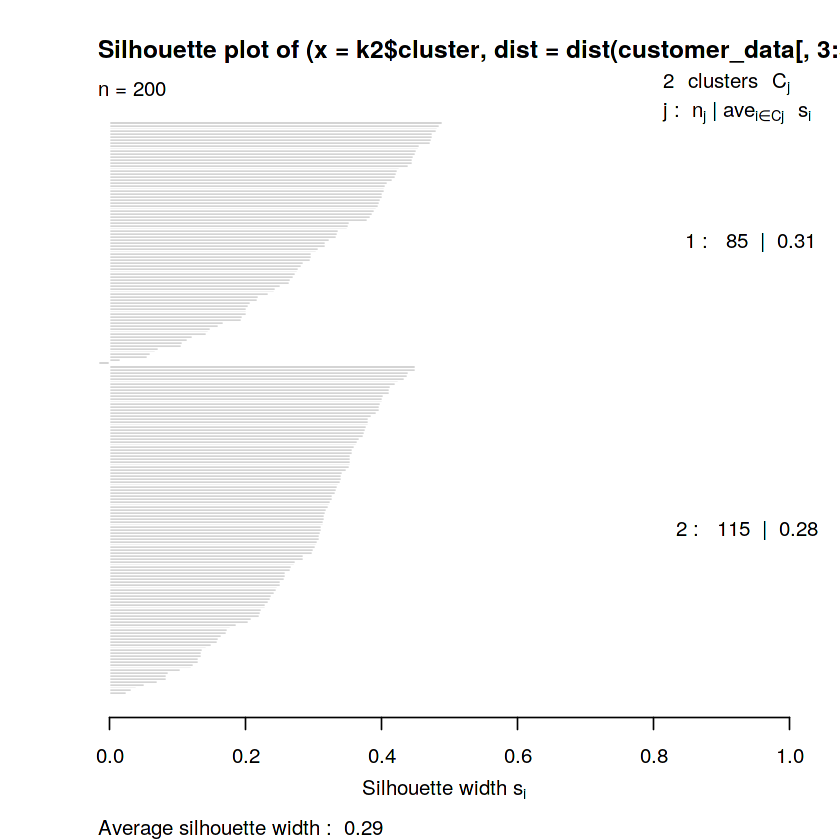

In [ ]:
library(cluster)
library(gridExtra)
library(grid)


k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

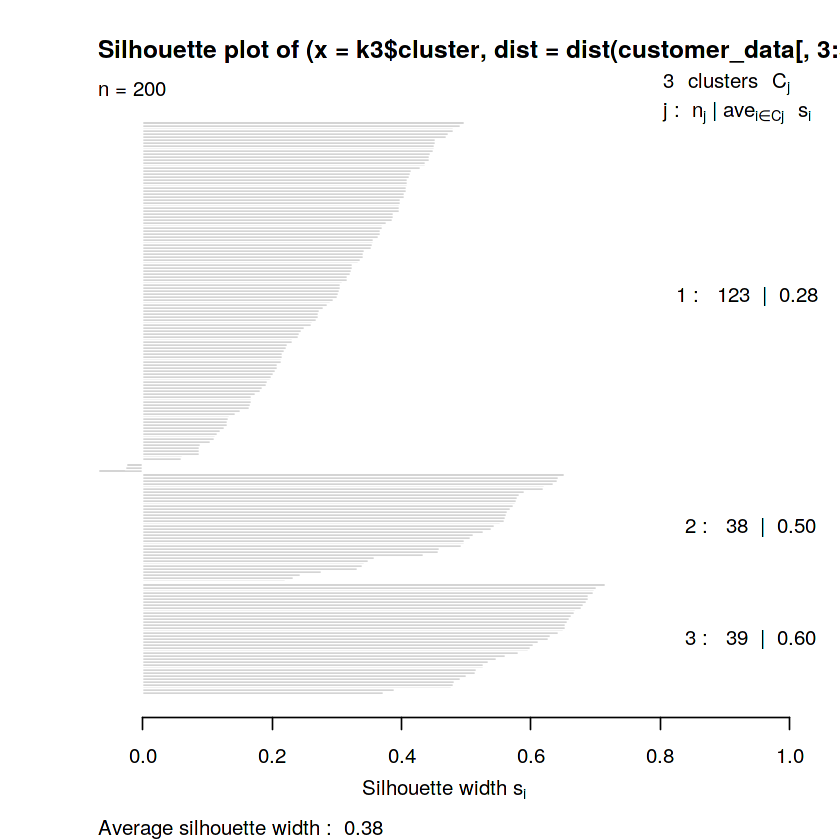

In [ ]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

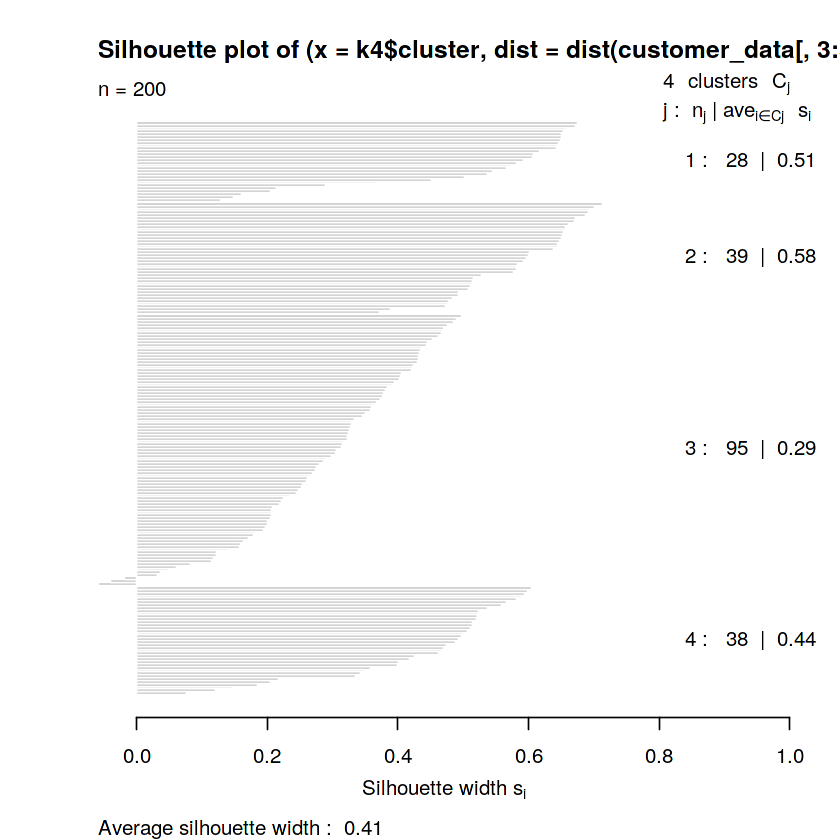

In [ ]:
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

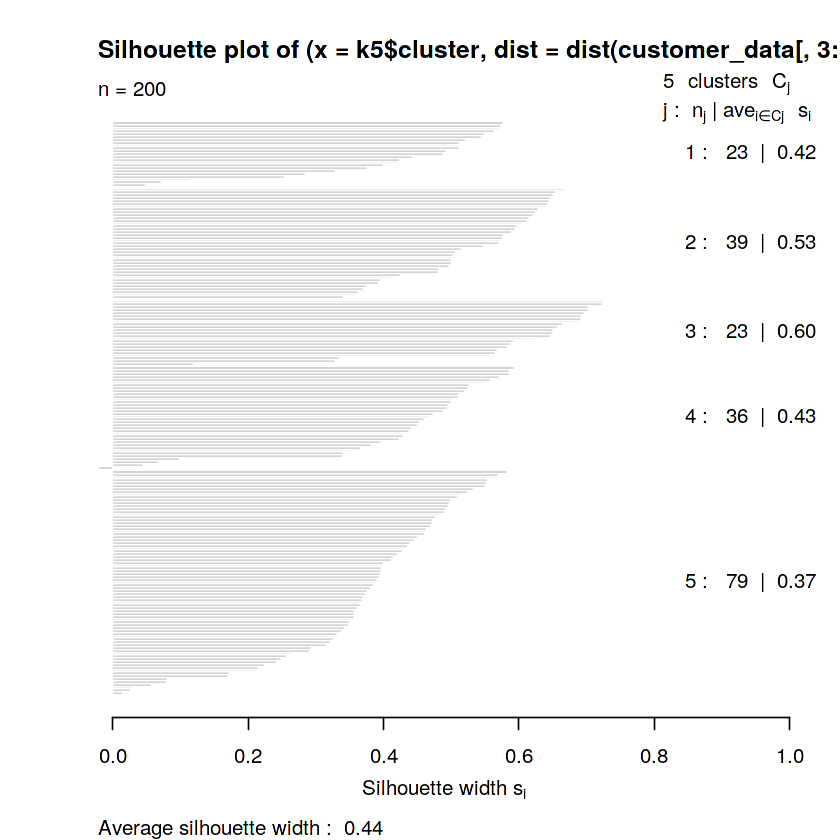

In [ ]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

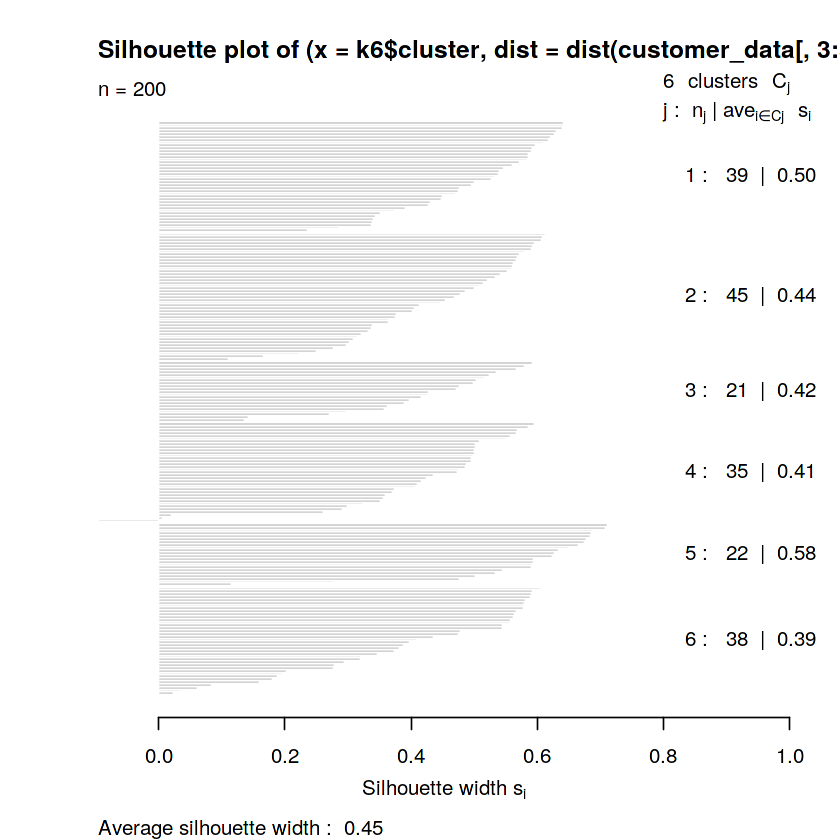

In [ ]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

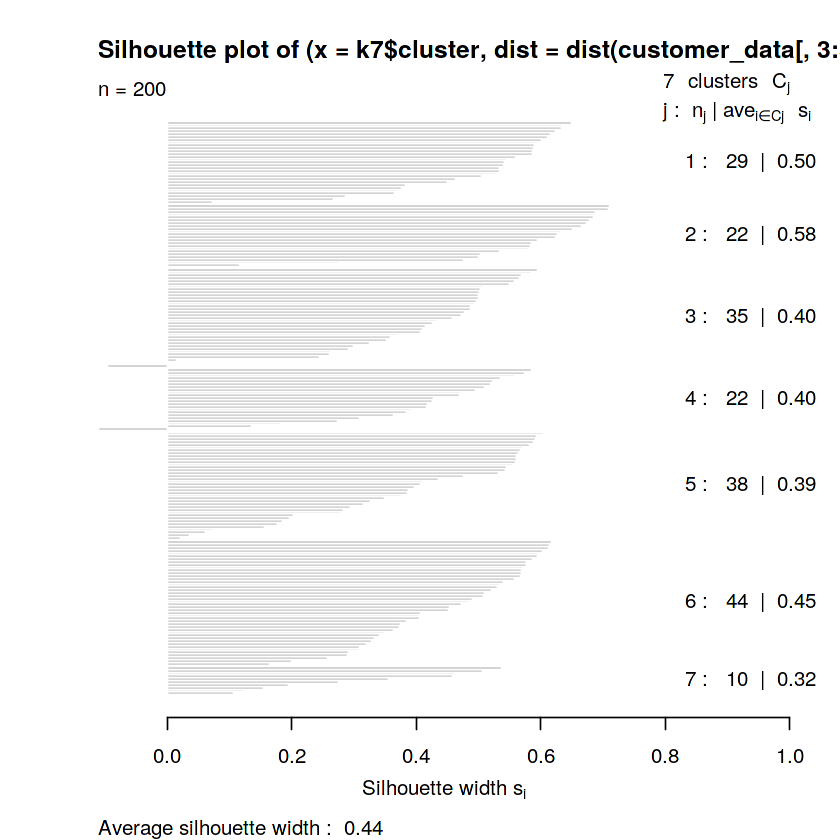

In [ ]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

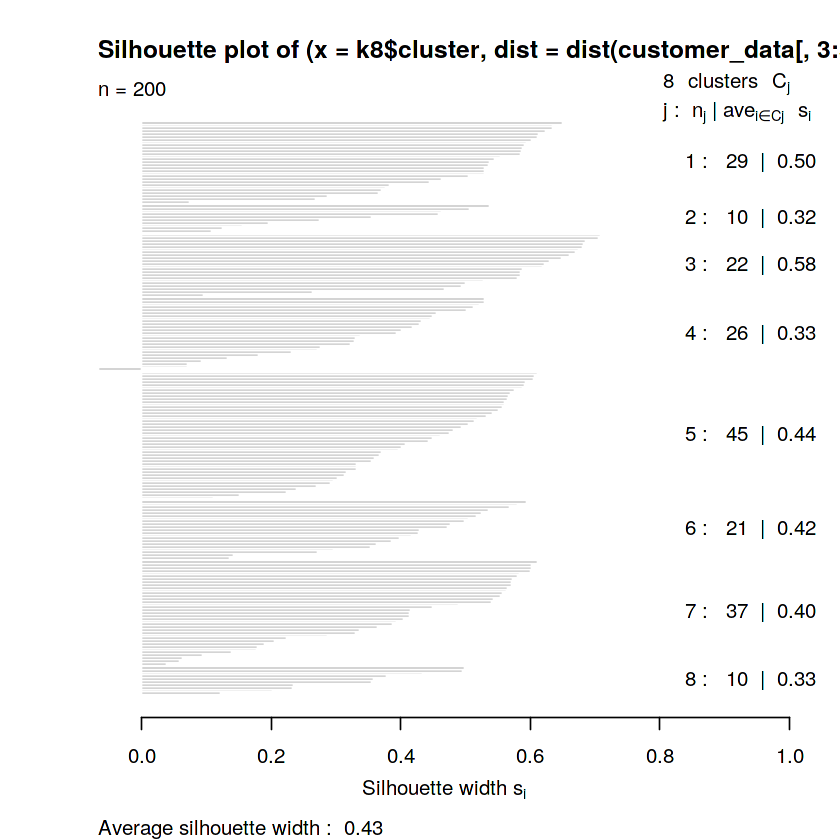

In [ ]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

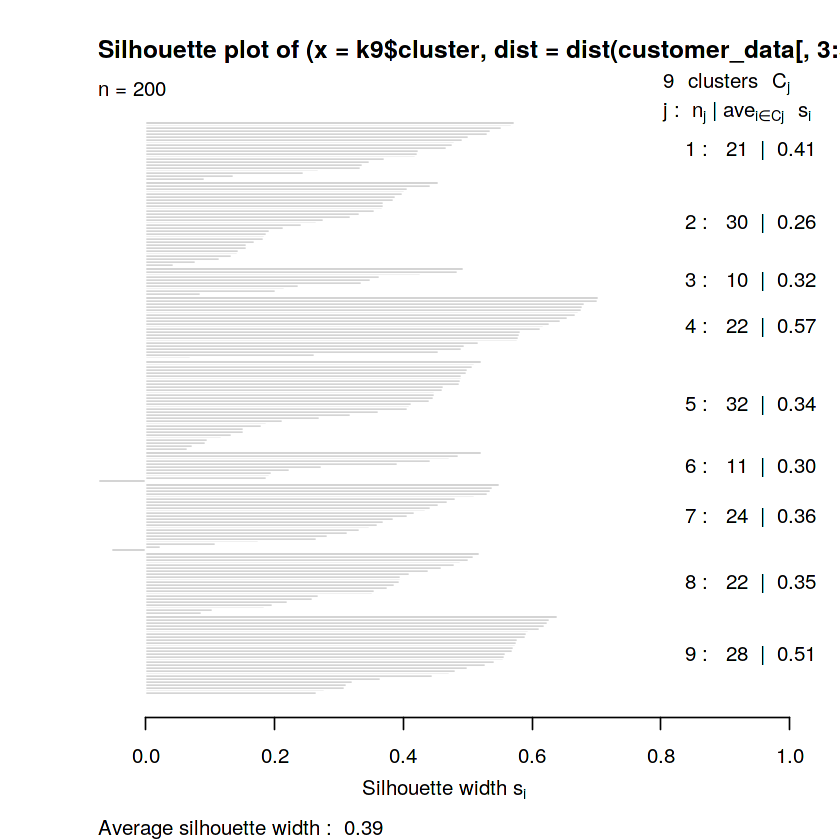

In [ ]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

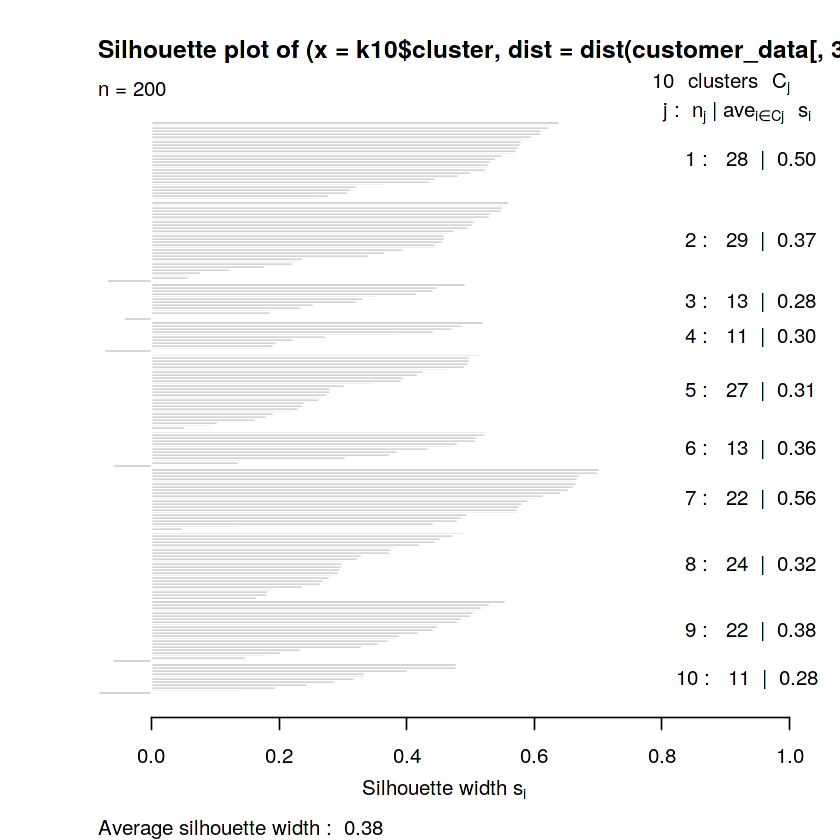

In [ ]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

Now, we make use of the fviz_nbclust() function to determine and visualize the optimal number of clusters as follows.

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



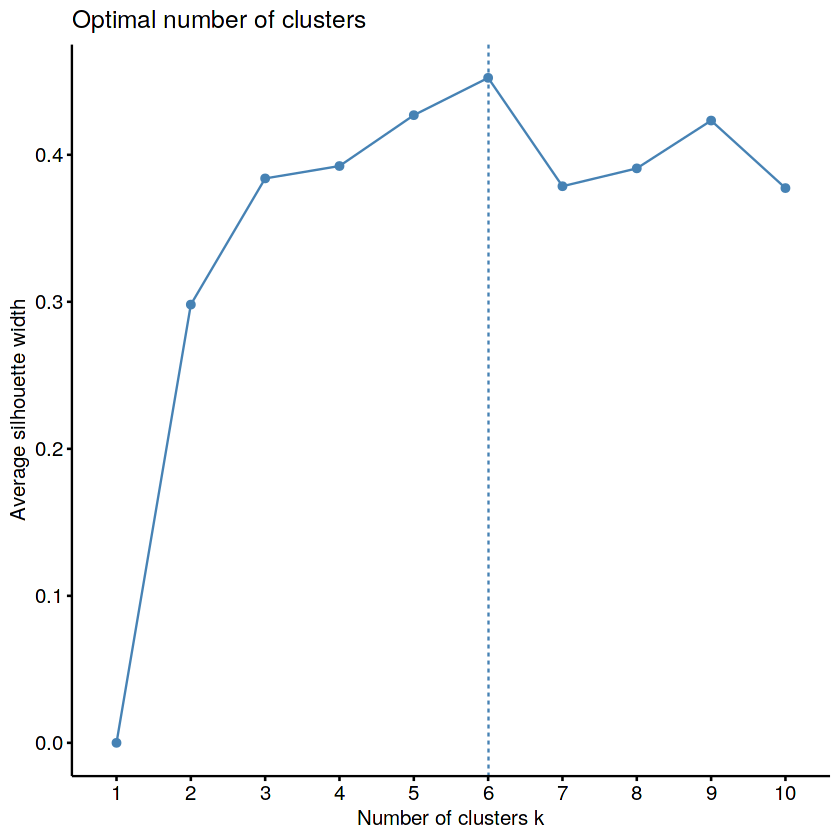

In [ ]:
library(NbClust)
library(factoextra)

fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")

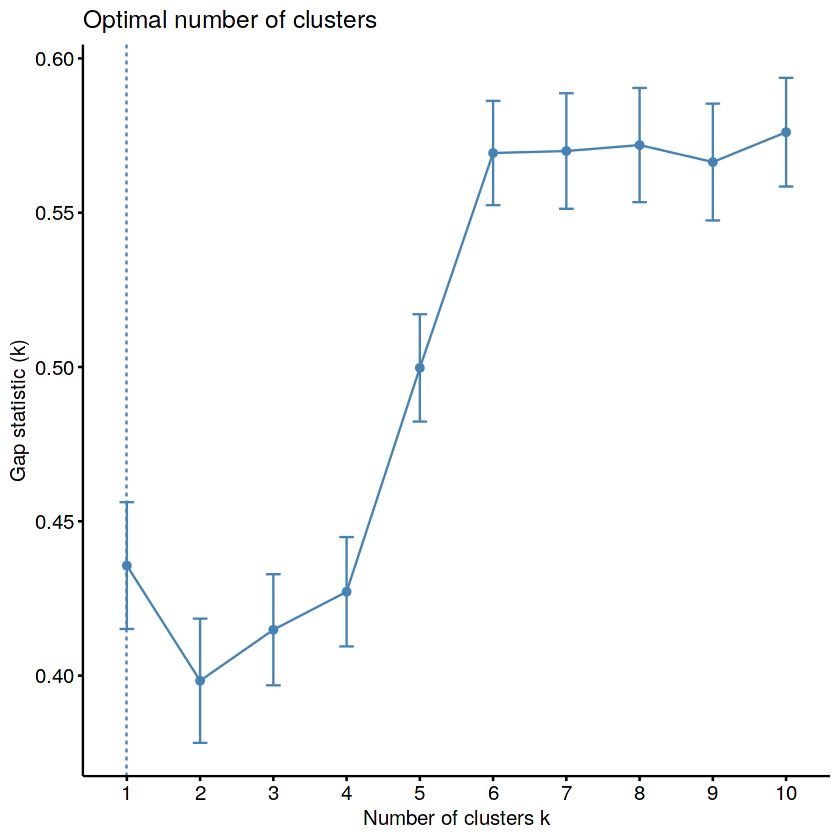

In [ ]:
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

### Now, let us take k = 6 as our optimal cluster –Now, let us take k = 6 as our optimal cluster.

In [ ]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 45, 22, 21, 38, 35, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 56.15556           53.37778               49.08889
2 25.27273           25.72727               79.36364
3 44.14286           25.14286               19.52381
4 27.00000           56.65789               49.13158
5 41.68571           88.22857               17.28571
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 [38] 2 3 2 1 2 1 4 3 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 [75] 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
[112] 4 4 4 4 4 1 1 1 1 4 4 4 6 4 6 5 6 5 6 5 6 4 6 5 6 5 6 5 6 5 6 4 6 5 6 5 6
[149] 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5
[186] 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6

Within cluster sum of squares by cluster:
[1]  8062.133  4099.818  7732.381  7742.895 166

In [ ]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

pcclust$rotation[,1:2]

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


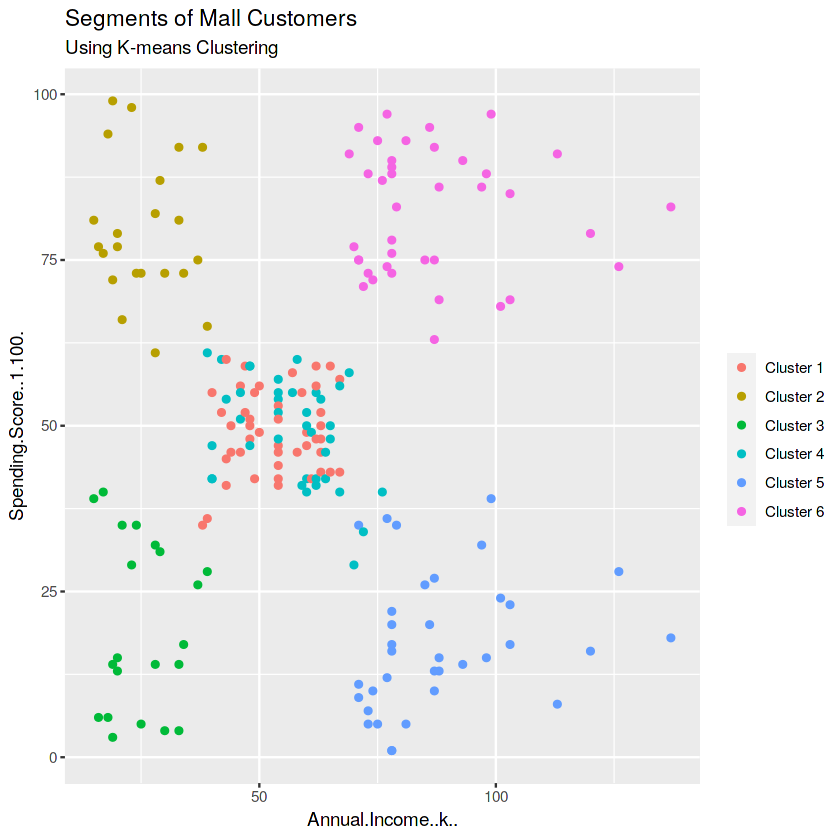

In [ ]:
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

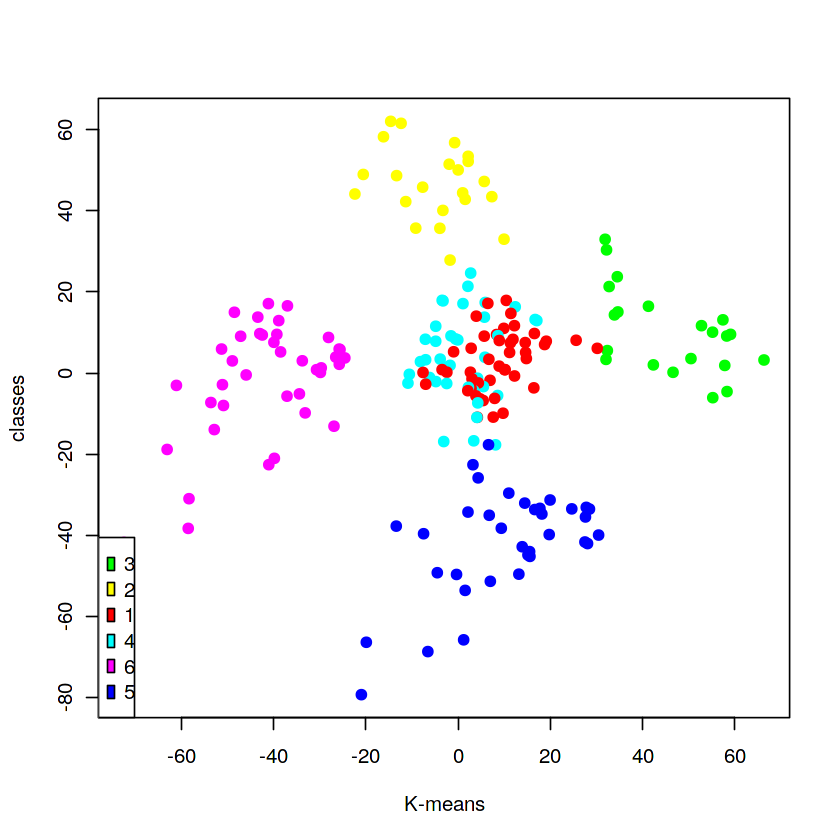

In [ ]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))